In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np

# Exercise 4

* Hints: 08/04/2020
* Hand-in: 15/04/2020
* Solutions: 22/04/2020
* *There will be no penalty for late hand-in, but handing in on-time will allow theTAs to address your problems.*

## 1

Show that the Hadamard gate can be written in the following two forms

$$H = \frac{X+Z}{\sqrt{2}} \sim \exp\left(i \frac{\pi}{2} \, \frac{X+Z}{\sqrt{2}}\right).$$

Here $\sim$ is used to denote that the equality is valid up to a global phase, and hence that the resulting gates are physically equivalent.

Hint: it might even be easiest to prove that $e^{i\frac{\pi}{2} M} \sim M$ for any matrix whose eigenvalues are all $\pm 1$, and that such matrices uniquely satisfy $M^2=I$.

## 2

The Hadamard can be constructed from `rx` and `rz` operations as

$$ R_x(\theta) = e^{i\frac{\theta}{2} X}, ~~~ R_z(\theta) = e^{i\frac{\theta}{2} Z},\\ H \equiv \lim_{n\rightarrow\infty} \left( ~R_x\left(\frac{\theta}{n}\right) ~~R_z \left(\frac{\theta}{n}\right) ~\right)^n.$$

For some suitably chosen $\theta$. When implemented for finite $n$, the resulting gate will be an approximation to the Hadamard whose error decreases with $n$.

The following shows an example of this implemented with Qiskit with an incorrectly chosen value of $\theta$ (and with the global phase ignored).

* Determine the correct value of $\theta$.

* Show that the error (when using the correct value of $\theta$) decreases quadratically with $n$.

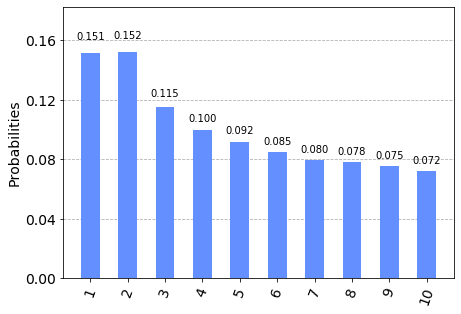

In [7]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

error = {}
for n in range(1,11):

    # Create a blank circuit
    qc = QuantumCircuit(q,c)
    
    # Implement an approximate Hadamard
    theta = np.pi # here we incorrectly choose theta=pi
    for j in range(n):
        qc.rx(theta/n,q[0])
        qc.rz(theta/n,q[0])
      
    # We need to measure how good the above approximation is. Here's a simple way to do this.
    # Step 1: Use a real hadamard to cancel the above approximation.
    # For a good approximatuon, the qubit will return to state 0. For a bad one, it will end up as some superposition.
    qc.h(q[0])
    
    # Step 2: Run the circuit, and see how many times we get the outcome 1.
    # Since it should return 0 with certainty, the fraction of 1s is a measure of the error.
    qc.measure(q,c)
    shots = 20000
    job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
    try:
        error[n] = (job.result().get_counts()['1']/shots)
    except:
        pass
        
plot_histogram(error)

## 3

An improved version of the approximation can be found from,

$$H \equiv \lim_{n\rightarrow\infty} \left( ~ R_z \left(\frac{\theta}{2n}\right)~~ R_x\left(\frac{\theta}{n}\right) ~~ R_z \left(\frac{\theta}{2n}\right) ~\right)^n.$$

Implement this, and investigate the scaling of the error.